# Decision trees, bagging and random forest

### Несколько моментов о домашках

1. Как хранить картинки.
2. Когда используете дополнительные признаки (полиномиальные, one-hot, и т. д.) не забывайте обновлять список колонок.

### Мультиклассификация используя бинарные классификаторы.

1. One vs All - максимальная вероятность
2. One vs One - голосование, "круговой турнир"

## Деревья

![](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/image/decisionTree/classification.jpg)

### Преимущества деревьев

1. Быстрое обучение.
2. Быстрые предсказания.
3. Легко понимаемый принцип работы.
4. Легко интерпретируемые предсказания.

[Классический пример работы деревьев](http://ru.akinator.com/)

![](http://perclass.com/doc/guide/images/clas_sdtree_2.png)

* Какие преимущества работы только с одной переменной?
* Какие недостатки?
* Что такое предсказание в дереве?
* В чем заключается обучение? (выбор признака, выбор предела)

### Чистота узла (node purity)

![](images/1.png)

### Мера (не)чистоты [(gini impurity)](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

Вероятность ошибки, если взять случайный элемент из узла и классифицировать весь узел используя класс случайного элемента.

Пусть в узле у нас 3 красных, 2 зеленых и 5 желтых элемента. 
Вероятность выбрать красный 0.3, вероятность при этом совершить ошибку 0.7, общая 0.21

для зеленого 0.2 * 0.8 = 0.16

для желтого 0.5 * 0.5 = 0.25

Суммарная gini impurity 0.21 + 0.16 + 0.25 = 0.62

При выборе следующего деления узла выбирается такое, при котором ощущается максимальный прирост чистоты в дереве.

![](images/2.png)

### Сравнение gini impurity и ошибки классификации

Путь у нас есть 50 красных и 50 зеленых элементов. (gi 0.5)

Первое деление делит на два узла 40|10 (gi 0.32) 10|40 (gi 0.32)  
Второе правило делит на 30|0 (gi 0) 20|50 (gi 0.4)

В обоих случаях 20 элементов классифицированы неправильно.  
В первом gini gain 0.5 - 0.5 \* 0.32 - 0.5 \* 0.32 = 0.16  
Во втором 0.5 - 0.3 \* 0 - 0.7 \* 0.4 = 0.22

Выводы?

### Псевдокод алгоритма

1. Проверить соответствует ли дерево уловиям остановки.
2. Для каждого признака посчитать лучший предел дающий наибольший прирост чистоты.
3. Выбрать максимальное значение из посчитанных на шаге 2 и создать узел в дереве.
4. Повторить с 1 шага для каждого поддерева нового узла.

Производит ли этот алгоритм оптимальное дерево? Что такое *оптимальное* дерево в данном случае?

### Критерии остановки

1. Все элементы узла относятся к одному классу.
2. Узел содержит меньше чем X элементов.
3. Достигнута максимальная глубина.
4. Достигнута необходимая чистота узла.
5. Достигнут максимум "листьев".

### "Обрезка" деревьев ([Tree pruning](https://en.wikipedia.org/wiki/Pruning_(decision_trees)))

Не поддерживается в sklearn :(

### Недостатки деревьев

1. Чувствительность к небольшим изменениям в данных.
2. Переобучение.
3. Границы только вдоль осей.

![](images/3.png)

### "Мудрость толпы"

Коллективное знание **разнообразных и независимых** людей обычно 
превосходит знание каждого индивидуума и может быть извлечено 
с помощью голосования.

### [Netflix Prize](https://www.youtube.com/watch?v=ImpV70uLxyw)

### [Ensembles](https://en.wikipedia.org/wiki/Ensemble_learning)

* Одно дерево не обладает хорошей производительностью.
* Зато строится СУПЕР быстро.
* Можем ли мы пожертвовать немного скоростью, чтобы выиграть в точности?
* Что если мы построим МНОГО деревьев?

ВАЖНО! Много одинаковых деревьев не даст никакого толка :)

### Bootstrap спешит на помощь.

Вспоминаем урок статистики. Способ генерирования данных похожих, но отличающихся.

* Вынули N строк данных.
* Вставили N случайных строк из исходной выборки.

Круто, больше данных! Можно ли генерировать данные для кроссвалидации так?

**НЕТ!** Вы не должны показывать модели те данные, которые она использует для оценки. А данные из бутстрапа по сути те же...

### [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating) - Bootstrap AGGregatING

1. Сгенерировать N датасетов бутстрапом.
2. Обучить классификатор на каждом.
3. Результат усреднить.

![](images/4.png)

1. Уменьшает влияние переобучения (дисперсию).
2. Обычно используется только с одним типом классификаторов.
3. Часто используется с деревьями.
4. **Не помогает с линейными моделями** - среднее от нескольких прямых - тоже прямая...
5. Легко параллелизируется

## Random Forest

1. Продолжает идею bagging.
2. Каждое дерево строится из бутстрап датасета.
3. Каждый узел в дереве создается из случайного подмножества признаков.

Параметры леса

1. Сколько деревьев создаем?
2. Размер подмножества признаков?

Ошибки в модели зависят от...

1. Корреляции между деревьями (больше-хуже).
2. Предиктивной силы индивидуальных деревьев (больше-лучше).

Увеличение размера подмножества признаков увеличивает оба :(

Полезные особенности Random Forest

* [Out of Bag Error](https://en.wikipedia.org/wiki/Out-of-bag_error)
* [Variable Importance](http://alandgraf.blogspot.com/2012/07/random-forest-variable-importance.html)
* [Proximity Estimation](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#prox)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import imp

common_ds = imp.load_source('common_ds','../common_ds.py')

In [2]:
df=pd.read_csv("../lesson_8/data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


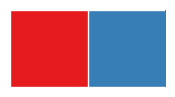

In [14]:
current_palette = sns.color_palette('Set1', 2)
sns.palplot(current_palette)

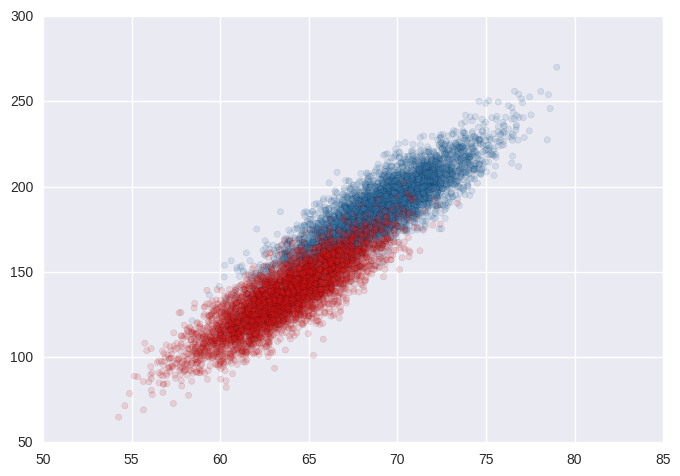

In [4]:
colors_vector = [current_palette.as_hex()[i] for i in df.Gender=="Male"]
plt.scatter(df.Height, df.Weight, c=colors_vector, alpha=0.15)

In [5]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

using mask
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.87
[[1722  266]
 [ 241 1771]]
########################################################


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

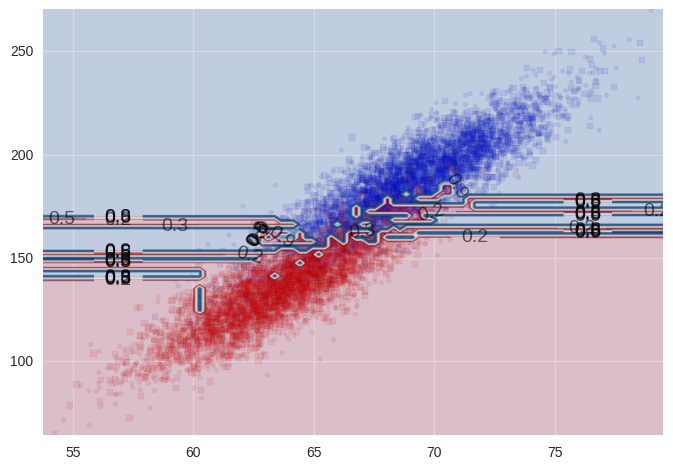

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
# parameters = {"max_depth": [2]}
parameters = {}
clf_tree, Xtrain, ytrain, Xtest, ytest=common_ds.do_classify(clf_tree, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
ax=plt.gca()
common_ds.points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clf_tree)
clf_tree

In [7]:
estimator = clf_tree

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
values = estimator.tree_.value

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node. Prediction: %s" % (int(node_depth[i]) * "\t", i, values[i]))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %ss else to "
              "node %s."
              % (int(node_depth[i]) * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 162.612426758s else to node 4.
	node=1 test node: go to node 2 if X[:, 1] <= 153.578887939s else to node 3.
		node=2 leaf node. Prediction: [[ 2484.   132.]]
		node=3 leaf node. Prediction: [[ 294.  186.]]
	node=4 test node: go to node 5 if X[:, 1] <= 169.168289185s else to node 6.
		node=5 leaf node. Prediction: [[ 133.  227.]]
		node=6 leaf node. Prediction: [[  101.  2443.]]


In [17]:
DecisionTreeClassifier?

using mask
BEST {'max_features': None, 'min_samples_split': 2, 'max_depth': 5} 0.912833333333
############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.92
[[1820  168]
 [ 165 1847]]
########################################################


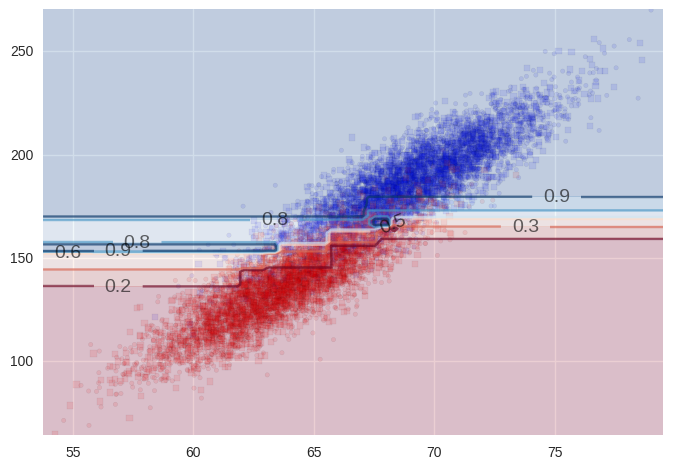

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
parameters = {"max_features": ['auto', 'sqrt', 'log2', None], "max_depth": [5, 10, None], "min_samples_split": [2, 5, 10]}
clf_tree, Xtrain, ytrain, Xtest, ytest=common_ds.do_classify(clf_tree, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
ax=plt.gca()
common_ds.points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clf_tree)

using mask
BEST {'n_estimators': 15} 0.898833333333
############# based on standard predict ################
Accuracy on training data: 0.99
Accuracy on test data:     0.90
[[1788  200]
 [ 201 1811]]
########################################################


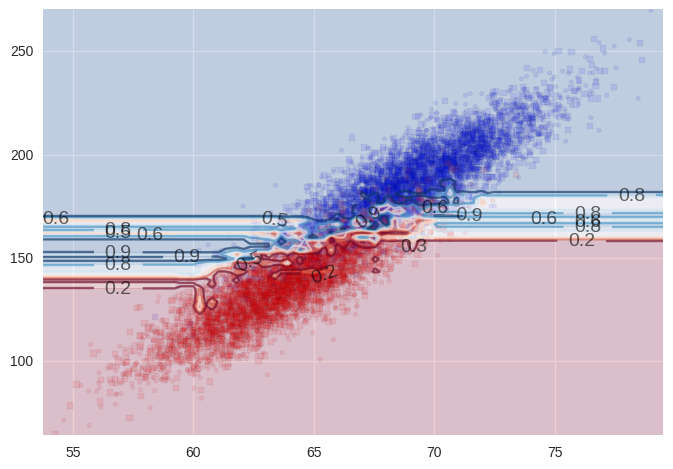

In [19]:
from sklearn.ensemble import BaggingClassifier

clf_bag = BaggingClassifier(DecisionTreeClassifier())
parameters = {"n_estimators": [2, 5, 10, 15]}
clf_bag, Xtrain, ytrain, Xtest, ytest=common_ds.do_classify(clf_bag, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
ax=plt.gca()
common_ds.points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clf_bag)

using mask
BEST {'n_estimators': 100, 'oob_score': True} 0.905
############# based on standard predict ################
Accuracy on training data: 1.00
Accuracy on test data:     0.91
[[1815  173]
 [ 195 1817]]
########################################################


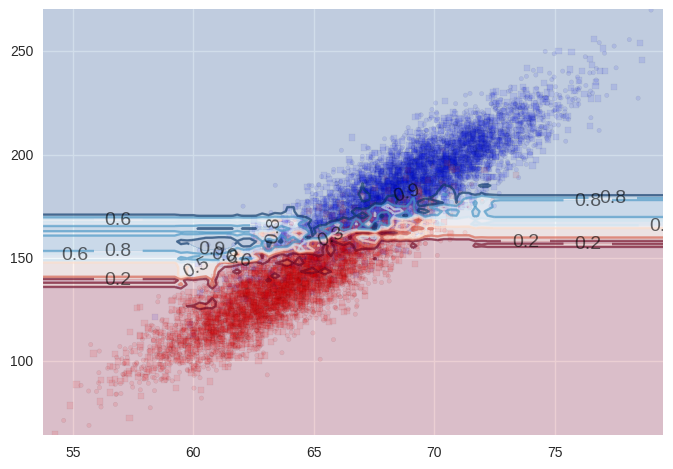

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier()
parameters = {"n_estimators": [2, 5, 10, 15, 50, 100], "oob_score":[True]}
clf_forest, Xtrain, ytrain, Xtest, ytest=common_ds.do_classify(clf_forest, parameters, df, ['Height','Weight'],'Gender', "Male", mask=mask)
Xtr=np.concatenate((Xtrain, Xtest))
ax=plt.gca()
common_ds.points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, clf_forest)

In [23]:
clf_forest.feature_importances_

array([ 0.39019995,  0.60980005])

In [12]:
clf_forest.oob_score_

0.90200000000000002

## Полезная литература

1. ["Elements of Statistical Learning"](http://statweb.stanford.edu/~tibs/ElemStatLearn/)
2. ["Pattern Recognition and Machine Learning"](http://research.microsoft.com/en-
us/um/people/cmbishop/PRML/)

## Домашнее задание

Домашнего задания сегодня не будет. Догоняйте с прошлыми заданиями и выбирайте проекты.